In [2]:
import numpy as np

In [3]:
x = np.array([[0.1, 1.0, 22.8], [0.5, 5.0, 41.2], [1.2, 12.0, 2.8], [0.8, 8.0, 14.0]])

In [4]:
x

array([[ 0.1,  1. , 22.8],
       [ 0.5,  5. , 41.2],
       [ 1.2, 12. ,  2.8],
       [ 0.8,  8. , 14. ]])

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

In [7]:
scaler.scale_

array([ 0.40311289,  4.03112887, 14.04421589])

In [8]:
scaler.mean_

array([ 0.65,  6.5 , 20.2 ])

In [9]:
scaled_x.mean(axis=0)

array([ 1.66533454e-16, -1.38777878e-17,  1.52655666e-16])

In [10]:
scaled_x

array([[-1.36438208, -1.36438208,  0.18512959],
       [-0.3721042 , -0.3721042 ,  1.4952775 ],
       [ 1.36438208,  1.36438208, -1.23894421],
       [ 0.3721042 ,  0.3721042 , -0.44146288]])

In [11]:
scaled_x.mean().round(decimals=4)

0.0

In [12]:
scaled_x.std(axis=0)

array([1., 1., 1.])

In [13]:
from sklearn.preprocessing import OneHotEncoder
roles = np.array([('Tom', 'manager'),
('Mary', 'developer'),
('Ann', 'recruiter'),
('Jim', 'developer')])

In [14]:
encoder = OneHotEncoder()

In [15]:
encoded_roles = encoder.fit_transform(roles[:, [1]])

In [16]:
encoded_roles.toarray()

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [17]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [18]:
df = pd.read_csv('02_MY2021_Fuel_Consumption_Ratings.csv')
df.head()
#x, y = df(return_X_y=True)
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.44, random_state=0)

,Year,Make,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_city,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb_MPG,CO2_Emissions,CO2_Rating,Smog_Rating
0,2021,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,199,6,3
1,2021,Acura,NSX,Two-seater,3.5,6,AM9,Z,11.1,10.8,11.0,26,256,4,3
2,2021,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2021,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2021,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


Text(0, 0.5, 'CO2_Emissions')

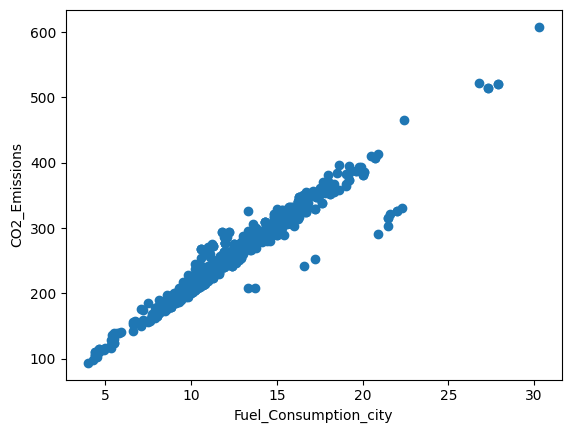

In [21]:
import matplotlib.pyplot as plt
plt.scatter(x=df['Fuel_Consumption_city'], y= df["CO2_Emissions"])
plt.xlabel('Fuel_Consumption_city')
plt.ylabel('CO2_Emissions')

In [22]:
y =df[["CO2_Emissions"]]
x = df[["Fuel_Consumption_city"]]
print(x.shape)
print(y.shape)

(883, 1)
(883, 1)


In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 0)

In [24]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [25]:
lr.fit(x_train, y_train)

LinearRegression()

In [26]:
pred =lr.predict(x_test)

In [27]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
r2 = r2_score(y_test, pred)
print(r2)
mse = mean_squared_error(y_test, pred)
print(mse)
mae = mean_absolute_error(y_test, pred)
print(mae)

0.9356690726369469
200.61871492088412
8.840517240320393


In [28]:
y =df[["CO2_Emissions"]]
x = df[["Fuel_Consumption_city", "Engine_Size", "Cylinders"]]
print(x.shape)
print(y.shape)

(883, 3)
(883, 1)


In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 0)

In [30]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [31]:
lr.fit(x_train, y_train)

LinearRegression()

In [32]:
pred =lr.predict(x_test)

In [33]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
r2 = r2_score(y_test, pred)
print(r2)
mse = mean_squared_error(y_test, pred)
print(mse)
mae = mean_absolute_error(y_test, pred)
print(mae)

0.9388384081172132
190.7350083233425
8.929659622837057


In [34]:
import statsmodels.api as sm

In [35]:
model=sm.OLS(y,x).fit()

In [36]:
model_summary=model.summary()

In [37]:
print(model_summary)

                                 OLS Regression Results                                
Dep. Variable:          CO2_Emissions   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          6.336e+04
Date:                Tue, 12 Sep 2023   Prob (F-statistic):                        0.00
Time:                        21:36:26   Log-Likelihood:                         -3798.2
No. Observations:                 883   AIC:                                      7602.
Df Residuals:                     880   BIC:                                      7617.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------